Document Similarity using Vector Databases
Tasks:
1. Collect a dataset of at least 10 text documents of your choice (e.g. news articles, movie reviews, scientific papers).
2. Choose a vectorization technique such as TF-IDF, Doc2Vec, or BERT to convert each document into a numerical vector representation.
3. Create a vector database by storing the vectors of all the documents in a data structure such as a matrix or a database table.
4. Choose a similarity measure to calculate the similarity between two documents.
5. Implement a document similarity function that takes two documents as input and returns the similarity score using the chosen similarity measure.
6. Test your document similarity function by comparing pairs of documents and interpreting the results.
7. Evaluate the performance of your model using at least one metric such as precision, recall, F1 score, or Mean Average Precision (MAP).
8. Write a report summarizing your approach, results, and findings.


Deliverables:


1. A dataset of text documents
2. Vector representations of each document
3. A vector database containing the vectors of all the documents
4. A document similarity function that calculates the similarity between two documents
5. Results of the document similarity task
6. Evaluation metrics and their interpretation
7. A report summarizing your approach, results, and findings

**IMDB MOVIE REVIEWS DATASET**



##**1)Problem statment explanation:-**
    IMDb (Internet Movie Database) is an online database that provides information on movies, TV shows, and video games, as well as cast, production crew, and biographies. IMDb also features user-generated movie reviews and ratings.The reviews are labeled with sentiment labels indicating whether the reviewer's opinion of the movie is positive or negative.The dataset is commonly used for sentiment analysis tasks, where the goal is to classify the sentiment of a given movie review as positive or negative. This dataset is also used for natural language processing research, such as text classification and sentiment analysis algorithms.Each review is in text format, and contains information about the movie and the review itself, such as the title, user ID, review text, and rating. 

**Attributes present in our data:-**
*****************************************


1)**Review**:-  Review is the analysis of the film made by one person or collectively expressing the opinion on the movie. The peculiarity of movie review is that it does not simply evaluate the movie but gives very specific opinions which are the foundation of film review.
*****************************************

2)**Sentiment**:-Sentiment relates to the meaning of a word or sequence of words and is usually associated with an opinion or emotion.
*****************************************

##**2)Importing libraries**

In [ ]:
#importing the required libraries
import re #regular expressions for searching,validating text data
import nltk #The Natural Language Toolkit 
from nltk.corpus import stopwords #Large collection of linguistic data
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS#stop words provided by sklearn libary
from nltk.stem import WordNetLemmatizer# Text lemmatization
from sklearn.feature_extraction.text import CountVectorizer#Count based vectorization
from wordcloud import WordCloud ,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer#Term frequency vectorization
import pandas as pd#data manipulation
import numpy as np#numerical calculations
import seaborn as sns#visualization
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from textblob import TextBlob
from textblob import Word


##**3)Load the Imdb movie reviews dataset**

In [ ]:
data = pd.read_csv('/content/IMDB_Dataset.csv',encoding='utf-8')
#To print top 10 rows
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#To understand number of rows and columns
data.shape

(50000, 2)

In [ ]:
#To know about Null value count and dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
### Take the reviews text as a list of elements and then perform the basic preprocessing 
reviews= list(data['review'])
#reviews

In [ ]:
#counting no. of values for each attribute in that column
data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

**We can see here that sentiment has balanced proportion of positive and negative reviews**

<Axes: >

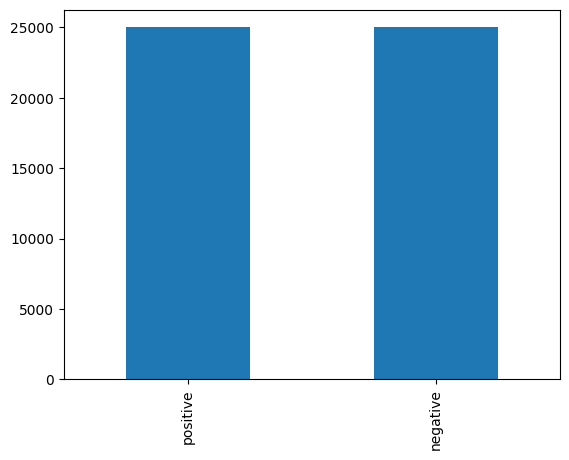

In [ ]:
# plot the label counts 
data['sentiment'].value_counts().plot(kind='bar')

##**4)Text Cleaning**-



**Text cleaning is important in natural language processing (NLP) to remove noise and irrelevant information from the text data, which can affect the quality of the analysis and the accuracy of the machine learning models trained on the data**.

**Regular expressions are a powerful tool for text cleaning in NLP, as they provide a flexible and efficient way to search, replace, and remove patterns of text that are not relevant to the analysis.**

In [ ]:
data['review'][24]

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It's great to see J.Beals but she's only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />"

### 4.a)**Basic text preprocessing where we remove special characters, any tags etc**
#### **1)Removal of html tags**
#### **2)Removal of special characters**
#### **3)Removal of email id**
#### **4)Removal of numbers.**
#### **5)Removal of stopwords**

**Lets see how to use regular expressions for different text docs and clean thrm accordingly**

In [ ]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
# Substitute 'll with "will" 
re.sub(r"'ll\b", " will", data['review'][0])

"One of the other reviewers has mentioned that after watching just 1 Oz episode you will be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the 

In [ ]:
# Substitute 't with "not" 
re.sub(r"'t\b", " not", data['review'][0])

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

**We cant clean all docs so we will use contradactions library**

**Lets write a small function where all our neccessary cleaning task is done**

###**4.b)Removal of stop words**

In [ ]:
# Stop words Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk_stopwords = set(stopwords.words('english'))
len(nltk_stopwords)


179

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
len(sklearn_stopwords)

318

In [ ]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'a', 'your', 'because', 'we', 'herself', 'what', 'only', 'which', 'no', 'in', 'some', 'ourselves', 'off', 'an', 'few', 'those', 'themselves', 'this', 'below', 'up', 'then', 'have', 'are', 'most', 'through', 'she', 'our', 'the', 'but', 'be', 'myself', 'that', 'me', 'once', 'over', 'above', 'where', 'was', 'than', 'their', 'here', 'each', 'his', 'own', 'all', 'other', 'ours', 'by', 'as', 'further', 'its', 'too', 'again', 'about', 'had', 'any', 'not', 'of', 'why', 'now', 'whom', 're', 'being', 'or', 'yourselves', 'on', 'and', 'can', 'who', 'were', 'nor', 'so', 'these', 'with', 'my', 'do', 'them', 'while', 'itself', 'very', 'same', 'i', 'yourself', 'from', 'should', 'both', 'has', 'he', 'during', 'out', 'if', 'am', 'such', 'will', 'hers', 'more', 'him', 'been', 'after', 'until', 'when', 'you', 'at', 'to', 'it', 'into', 'down', 'himself', 'against', 'they', 'is', 'her', 'yours', 'for', 'there', 'before', 'between', 'how', 'under'}


In [ ]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [ ]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(combined_stopwords)

378

###**4.c)Stemming or Lemmatization**

In [ ]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
#data['review'][0].split()

In [ ]:
new_sent = ''
for token in data['review'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent    

"besides being boring, the scene were oppressive and dark. the movie tried to portray some kind of moral, but fell flat with it message. what were the redeeming qualities?? on top of that, i don't think it could make librarian look any more unglamorous than it did. "

In [ ]:
!pip install contractions
import contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data['review'][24]

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It's great to see J.Beals but she's only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />"

In [ ]:
contractions.fix(data['review'][24])

'This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It is great to see J.Beals but she is only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who cannot get work does not feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />'

###**4.d)Define the Cleaner Function & Apply**

In [ ]:
import re

def review_cleaner_without_stopwords(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    #Using contractions library
    text = contractions.fix(text) 
    #Removal of special charecters
    text = re.sub(r'[#$!\*\)\(\\%:;,\'_-]','',text)
    # We'll retain on the alphabets & digits
    text = re.sub("@[A-Za-z0-9]+", "", text)#Removing the user mentions
    #remove the hashtags
    text=re.sub("#", "",text)
    #Retain on the alphabets (get rid of punctuations, special char, digits)
    text=re.sub(r"[^a-zA-Z]", " ",text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+\s', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove special characters except for apostrophes
    text = re.sub(r'[^\w\s\']', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    cleaned_text = ''
    for token in text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [ ]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['review']:
    cleaned_tweets.append(review_cleaner_without_stopwords(twt))

In [ ]:
data['cleaned_reveiws_w/o_SW'] = cleaned_tweets
data.head()

,review,sentiment,cleaned_reveiws_w/o_SW
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


#**5)Data Visualization**

###5.a)Text Visualization without Stop words

Plot the top 25 most common words in this reviews dataset

In [ ]:
# Write a code to collect all the words from all the reviews into a single list
all_words = []
for t in data['review']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', "you'll", 'be', 'hooked.', 'They', 'are', 'right,', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.<br', '/><br', '/>The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence,', 'which', 'set', 'in', 'right', 'from']


438729

**Plotting 25 most common words**

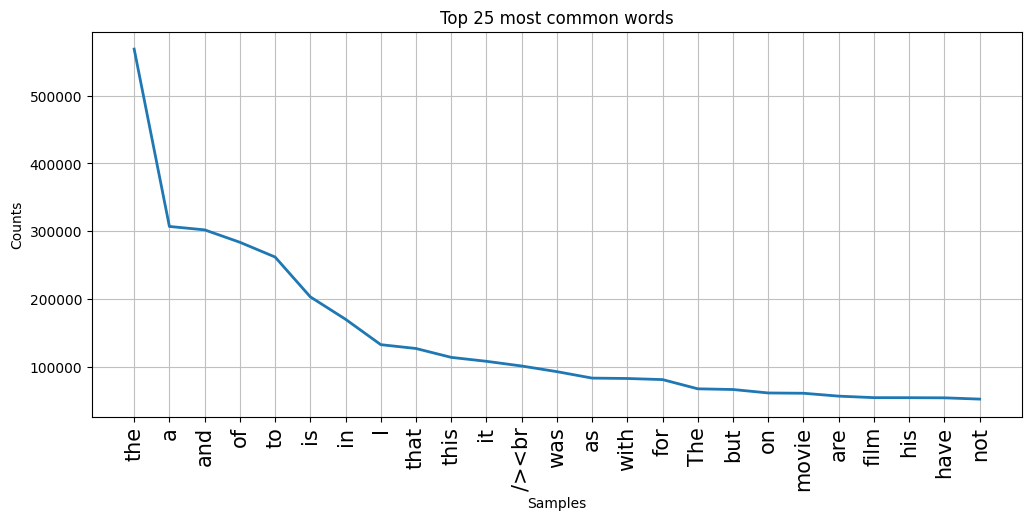

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

### Lets plot for cleaned_reveiws_w/o_SW

In [ ]:
# Write the code for plotting the cleaned tweets
all_words2 = []
for t in data['cleaned_reveiws_w/o_SW']:
    all_words2.extend(t.split())

print(all_words2[:50])

['one', 'of', 'the', 'other', 'reviewer', 'ha', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'will', 'be', 'hooked', 'they', 'are', 'right', 'a', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'wa', 'it', 'brutality', 'and', 'unflinching', 'scene', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the']


In [ ]:
len(set(all_words2)) # this is the number of unique words in the list

136564

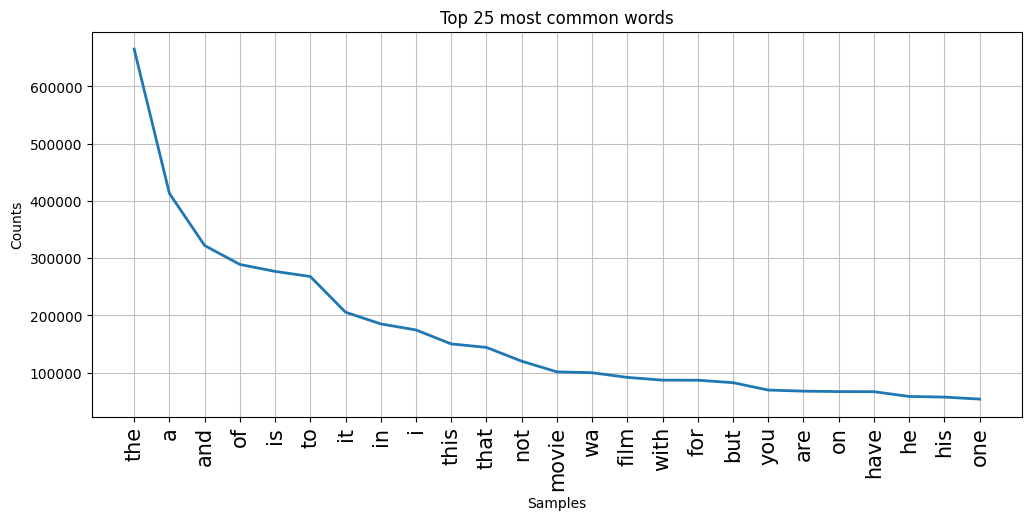

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words2)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

###**5.b).Data Visualization After applying Stop words**

In [ ]:
def review_cleaner_with_stopwords(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    #Using contractions library
    text = contractions.fix(text) 
    #Removal of special charecters
    text = re.sub(r'[#$!\*\)\(\\%:;,\'_-]','',text)
    # We'll retain on the alphabets & digits
    text = re.sub("@[A-Za-z0-9]+", "", text)#Removing the user mentions
    #remove the hashtags
    text=re.sub("#", "",text)
    #Retain on the alphabets (get rid of punctuations, special char, digits)
    text=re.sub(r"[^a-zA-Z]", " ",text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+\s', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove special characters except for apostrophes
    text = re.sub(r'[^\w\s\']', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    text = [token for token in text.split() if token not in combined_stopwords]
    
    text = [token for token in text if len(token)>2]
    
    cleaned_text = ''
    text_string = ' '.join(text)
    for token in text_string.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text


In [ ]:
type(combined_stopwords)

set

In [ ]:
cleaned_review = list(data['review'].apply(review_cleaner_with_stopwords))


In [ ]:
print(cleaned_review[:10])

['reviewer mentioned watching episode hooked right exactly happened thing struck brutality unflinching scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word called nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement far away say main appeal fact go show dare forget pretty picture painted mainstream audience forget charm forget romance mess episode saw struck nasty surreal say ready watched developed taste got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order away mannered middle class inmate turned prison bitch lack street skill prison experience watching comfortable uncomfortable viewing touch darker ', 'wonderful little production filming technique unas

In [ ]:
data['cleaned_reviews_with_SW'] = cleaned_review
data.head()

,review,sentiment,cleaned_reveiws_w/o_SW,cleaned_reviews_with_SW
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewer ha mentioned that af...,reviewer mentioned watching episode hooked rig...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,i thought this wa a wonderful way to spend tim...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,petter matteis love time money visually stunni...


['reviewer', 'mentioned', 'watching', 'episode', 'hooked', 'right', 'exactly', 'happened', 'thing', 'struck', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face']


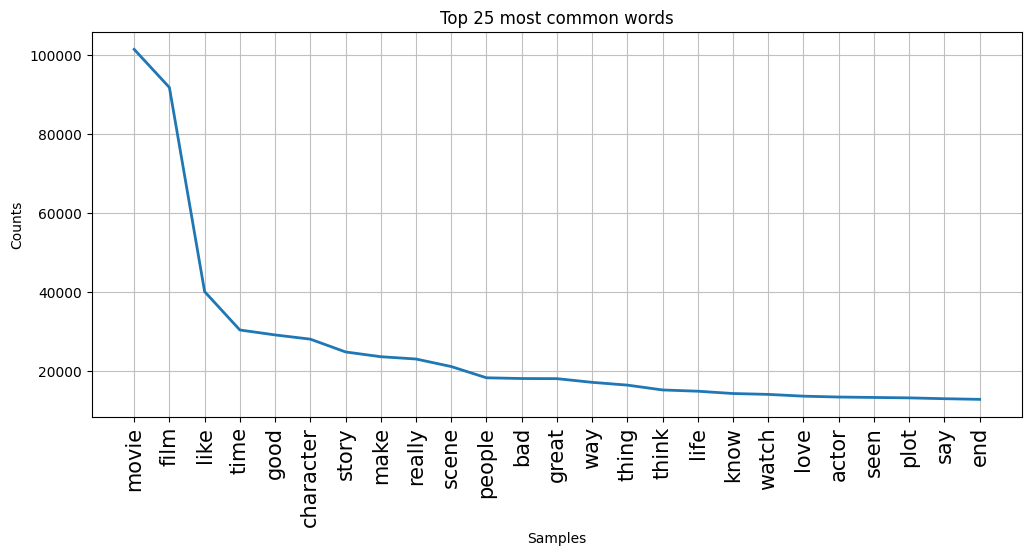

In [ ]:
all_words = []
for t in data['cleaned_reviews_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

###5.c).Data Visualization After applying Stop words and domain stop words

In [ ]:
domain_stopwords =['movie', 'film', 'plot', 'story', 'character', 'characters', 'scene',
    'scenes', 'act', 'acting', 'director', 'directing', 'cinematography',
    'script', 'screenplay', 'dialogue', 'genre', 'hollywood', 'oscar',
    'award', 'awards', 'review', 'critic', 'cinema', 'viewer', 'plotline',
    'sequel', 'prequel', 'trilogy', 'cast', 'crew', 'adaptation',
    'blockbuster', 'soundtrack', 'box', 'office', 'gross', 'rating',
    'genre', 'horror', 'comedy', 'drama', 'action', 'adventure', 'romance',
    'sci-fi', 'thriller', 'western', 'musical', 'animation', 'family',
    'fantasy', 'documentary', 'biography', 'independent', 'studio', 'release',
    'theater', 'screen', 'feature', 'motion', 'picture', 'tv', 'television',
    'show', 'episode', 'stream', 'streaming', 'netflix', 'prime', 'video',
    'watch', 'viewer', 'viewer', 'opinion', 'cinematic', 'movie-making',
    'hollywood', 'script', 'producing', 'studio', 'distribution', 'acting',
    'casting', 'performance', 'camera', 'lighting', 'mise-en-scène', 'score',
    'sound', 'editing', 'post-production', 'visual', 'special', 'effect',
    'make-up', 'costume', 'set', 'design', 'art', 'direction', 'premiere',
    'festival', 'red', 'carpet', 'paparazzi', 'celebrity', 'gossip',
    'tabloid', 'rumor', 'news', 'box', 'office', 'success', 'failure',
    'flop', 'hit', 'cult', 'classic', 'genre', 'subgenre', 'audience',
    'market', 'studio', 'money', 'budget', 'revenue', 'profit', 'loss',
    'investor', 'film-making', 'production', 'distributor', 'genre', 'oscars',
    'award-winning', 'cinematic', 'language', 'artistic', 'value', 'watchable',
    'entertaining', 'thrilling', 'emotional', 'humorous', 'funny', 'scary',
    'moving', 'suspenseful', 'satisfying', 'predictable', 'unpredictable',
    'overrated', 'underrated', 'good', 'great', 'bad', 'terrible', 'boring',
    'disappointing', 'uninteresting', 'forgettable', 'amazing', 'fantastic',
    'spectacular']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [ ]:
def review_cleaner_with_stopwords(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    #Using contractions library
    text = contractions.fix(text) 
    #Removal of special charecters
    text = re.sub(r'[#$!\*\)\(\\%:;,\'_-]','',text)
    # We'll retain on the alphabets & digits
    text = re.sub("@[A-Za-z0-9]+", "", text)#Removing the user mentions
    #remove the hashtags
    text=re.sub("#", "",text)
    #Retain on the alphabets (get rid of punctuations, special char, digits)
    text=re.sub(r"[^a-zA-Z]", " ",text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+\s', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove special characters except for apostrophes
    text = re.sub(r'[^\w\s\']', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    text = [token for token in text.split() if token not in final_stopwords]
    
    text = [token for token in text if len(token)>2]
    
    cleaned_text = ''
    text_string = ' '.join(text)
    for token in text_string.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text


['reviewer', 'mentioned', 'watching', 'hooked', 'right', 'exactly', 'happened', 'thing', 'struck', 'brutality', 'unflinching', 'violence', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'use', 'word', 'called', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda']


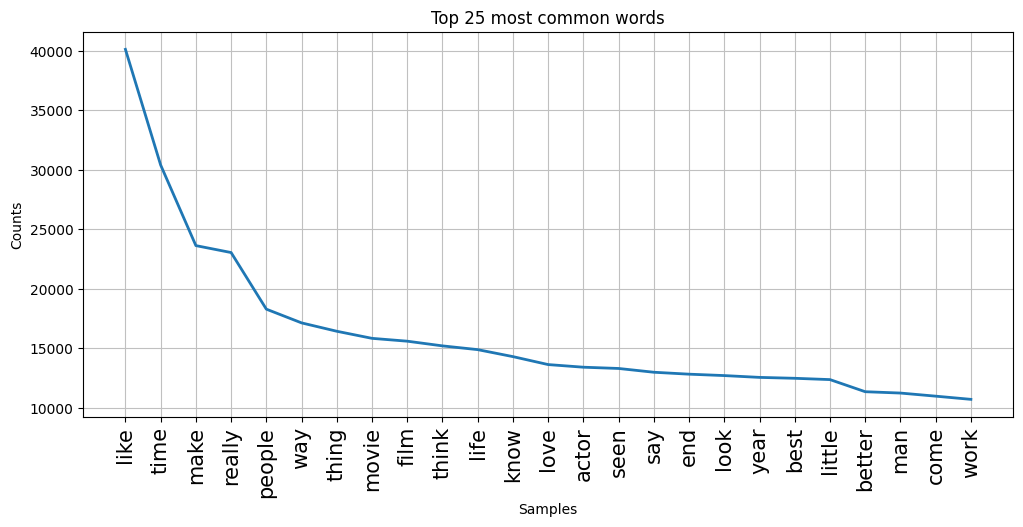

In [ ]:
cleaned_review = list(data['review'].apply(review_cleaner_with_stopwords))
data['cleaned_reviews_with_SW2'] = cleaned_review
data.head()
all_words = []
for t in data['cleaned_reviews_with_SW2']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [ ]:
data.head()

,review,sentiment,cleaned_reveiws_w/o_SW,cleaned_reviews_with_SW,cleaned_reviews_with_SW2
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewer ha mentioned that af...,reviewer mentioned watching episode hooked rig...,reviewer mentioned watching hooked right exact...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,wonderful little production filming technique ...,wonderful little filming technique unassuming ...
2,I thought this was a wonderful way to spend ti...,positive,i thought this wa a wonderful way to spend tim...,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...,basically family little boy jake think zombie ...,basically little boy jake think zombie closet ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,petter matteis love time money visually stunni...,petter matteis love time visually stunning mat...


**Now we have preprocessed text with stopwords,without stopwords,lets try to find few insights from the data we have to understand on how positive,negative reveiws differ in what kind of context,and find much more things.**

In [ ]:
data['review_length'] = data['cleaned_reviews_with_SW'].str.len()
data['review_length'].describe()

count    50000.000000
mean       716.377800
std        562.061474
min         18.000000
25%        368.000000
50%        524.000000
75%        873.000000
max       8394.000000
Name: review_length, dtype: float64

**An average review length is near to 524 letters**

<ipython-input-44-7efcaa2ec8be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['review_length']).set_title('review length distribution')


Text(0.5, 1.0, 'review length distribution')

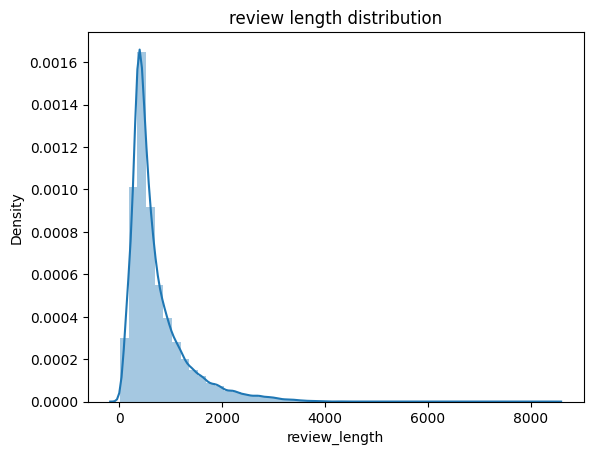

In [ ]:
sns.distplot(data['review_length']).set_title('review length distribution')

#6)Word clouds for positive and negative sentiments

In [ ]:
data.columns

Index(['review', 'sentiment', 'cleaned_reveiws_w/o_SW',
       'cleaned_reviews_with_SW', 'cleaned_reviews_with_SW2', 'review_length'],
      dtype='object')

In [ ]:
#function to create wordclouds
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

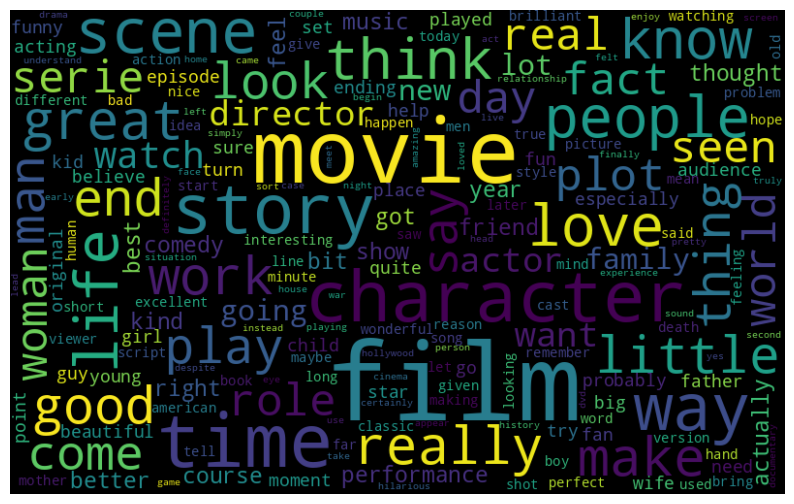

In [ ]:
#wordcloud for positive  sentiment
subset=data[data.sentiment=="positive"]
text=subset.cleaned_reviews_with_SW.values
words =" ".join(text)
create_wordcloud(words)

**After observing positive sentiment we can see that fe words such as good,plot,star,classic,better,beautiful,excellent,kind,these words are reflecting positive sentiments*

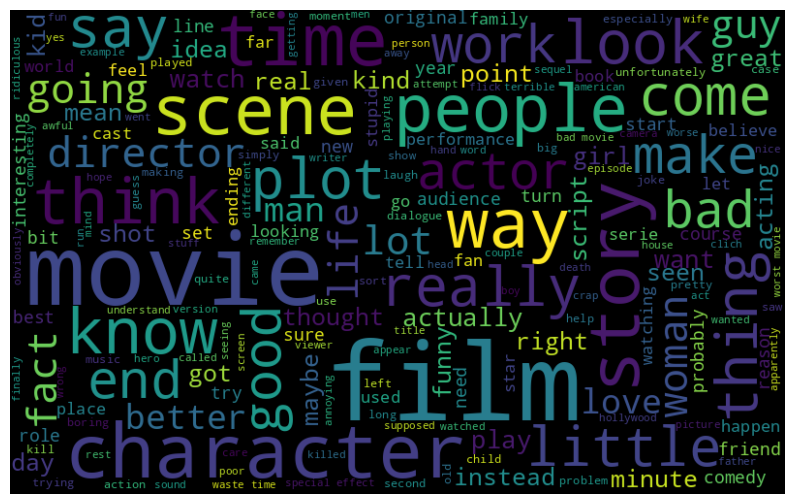

In [ ]:
#wordcloud for negative  sentiment
subset=data[data.sentiment=="negative"]
text=subset.cleaned_reviews_with_SW.values
words =" ".join(text)
create_wordcloud(words)

**After observing negative sentiment we can see that killed,kill,annoying,poor,wastetime,worse start,long,bad,these words are reflecting negative sentiments*

#7)length distibution across positive and negative sentiments

In [ ]:
positive = data.loc[np.where(data['sentiment'] == 'positive')].reset_index()
negative = data.loc[np.where(data['sentiment'] == 'negative')].reset_index()
hist_data = [positive['review_length'], negative['review_length']]

group_labels = ['positive','negative']

colors = ['blue', 'red']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors = colors)

# Add title
fig.update_layout(title_text='Length distribution each sentiments')
fig.show()

**Between 0-2000,both positive and negative have higher density while negative sentiment is dominating with more words.**

#**8)Label encoding**

In [ ]:
data.columns

Index(['review', 'sentiment', 'cleaned_reveiws_w/o_SW',
       'cleaned_reviews_with_SW', 'cleaned_reviews_with_SW2', 'review_length'],
      dtype='object')

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['sentiment_target']= label_encoder.fit_transform(data['sentiment']) 

In [ ]:
#data.to_csv('Imdb_preprocessed.csv')

In [ ]:
data.columns

Index(['review', 'sentiment', 'cleaned_reveiws_w/o_SW',
       'cleaned_reviews_with_SW', 'cleaned_reviews_with_SW2', 'review_length',
       'sentiment_target'],
      dtype='object')

In [ ]:
#End

**This is end to preprocessing python file and next we will use different vectorization methods such as tf-idf,doc2vec and measure similarity between them on top of different ml models and for doc2vec with word embeddings**